IRIS FLOWER PREDICTION

Iris Flower has 3 species: Setosa, Versicolor,Virginica which differs accordng to their measurements.

Objective: Assume that we have the measurements of the iris flower according to their species and task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset into dataframe(df)

# New Section

In [5]:
df=pd.read_csv('/content/Iris.csv')

Exploring the dataframe

After importing a dataframe, you can take a look at some of its features such as df.head(), df.tail(), df.shape(), df.describe()

In [6]:
df.head()  #head views the first five rows of the dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Attribute Information:

Id            - represents Id number in int datatype for each record
SepalLengthCm - Length of Sepal in centimeter in float datatype
SepalWidthCm  - Width of Sepal in centimeter in float datatype
PetalLengthCm - Length of Petal in centimeter in float datatype
PetalWidthCm  - Width of Petal in centimeter in float datatype
Species       - Species of Iris flower (Setosa, Versicolor,Virginica)

This dataset contains 150 instances in which each species has 50 instances.

In [7]:
df.shape    #shape returns a vector that shows the number of rows and columns

(150, 6)

In [8]:
df.info()   #info gives a summary of all the no. of rows and columns,column names in the dataset, count of non-null values,
            #their datatypes, memory usage (summary of the dataframe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.isnull().sum()     # exact number of missing values(null values) per column

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [10]:
df.describe()    #statistical summary of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
species_counts=df["Species"].value_counts()
species_counts

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


([<matplotlib.patches.Wedge at 0x79aa944f11d0>,
 [Text(-1.0336617865206896, -0.37622242236057196, 'Iris-setosa'),
  Text(0.8426491097070433, -0.7070661057566878, 'Iris-versicolor'),
  Text(0.19101207519835856, 1.0832886905753318, 'Iris-virginica')],
 [Text(-0.563815519920376, -0.20521223037849376, '33.3%'),
  Text(0.45962678711293264, -0.38567242132182966, '33.3%'),
  Text(0.1041884046536501, 0.5908847403138172, '33.3%')])

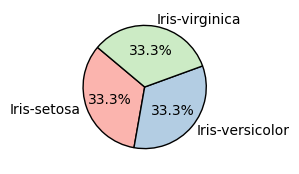

In [12]:
plt.figure(figsize=(2, 2))
plt.pie(
    species_counts,
    labels=species_counts.index,
    autopct='%1.1f%%',        # Show percentages
    startangle=140,           # Rotate the chart
    colors=plt.cm.Pastel1.colors,  # Use pastel colormap
    wedgeprops={'edgecolor': 'black'}  # Add edge to slices
)

Inference: Each species have equal samples of species.

Exploratory Data Analysis (EDA)

EDA is used to explore and analyse data with the help of data visualisation tools to identify the trends, patterns,relationships,correlations, outliers.

Step1: Convert the categorical variable (Species) into numerical variable
Step 2: Numerical variables generate histograms, box plots to visualize distribution, shape, spread and potential outliers.
Step 3: To find relationships between variables use scatter plots, correlation matrices

Histograms- use bar plots to illustrate the distribution of numerical data
Box plots - shows min value, max value, median, skewness
Scatter plots - to find the relationship
Correlation heatmap - shows how each of the variables in a dataset are correlated.

In [13]:
#Converting categorical variable into numerical form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df["Species"]

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Histogram of each features

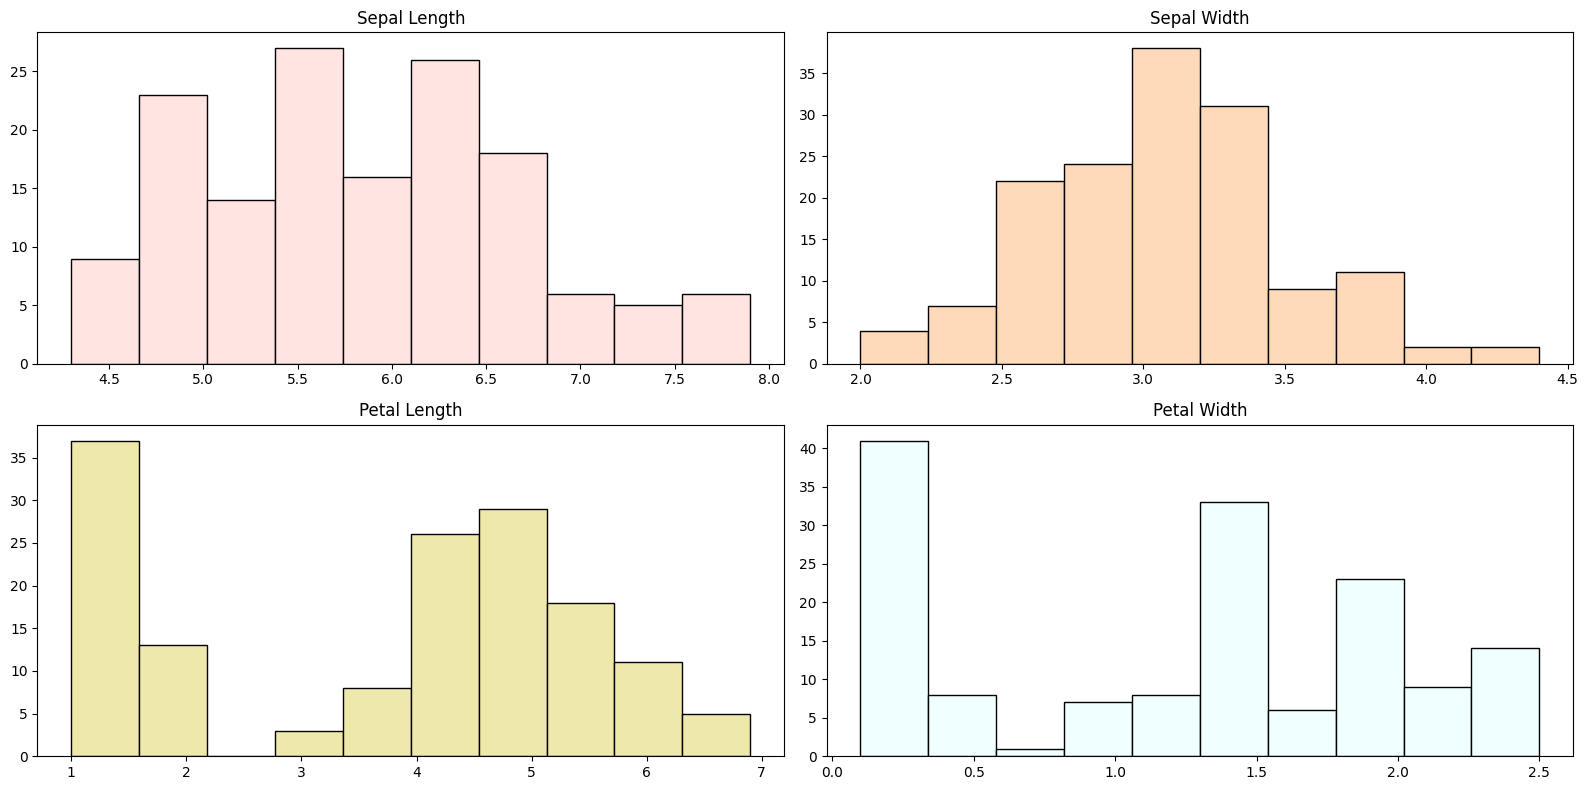

In [14]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
axes[0,0].hist(df['SepalLengthCm'],color='mistyrose',edgecolor='black')
axes[0, 0].set_title('Sepal Length')
axes[0,1].hist(df['SepalWidthCm'],color='peachpuff',edgecolor='black')
axes[0, 1].set_title('Sepal Width')
axes[1,0].hist(df['PetalLengthCm'],color='palegoldenrod',edgecolor='black')
axes[1, 0].set_title('Petal Length')
axes[1,1].hist(df['PetalWidthCm'],color='azure',edgecolor='black')
axes[1,1].set_title('Petal Width')
plt.tight_layout()
plt.show()

Boxplot of each features with respect to species

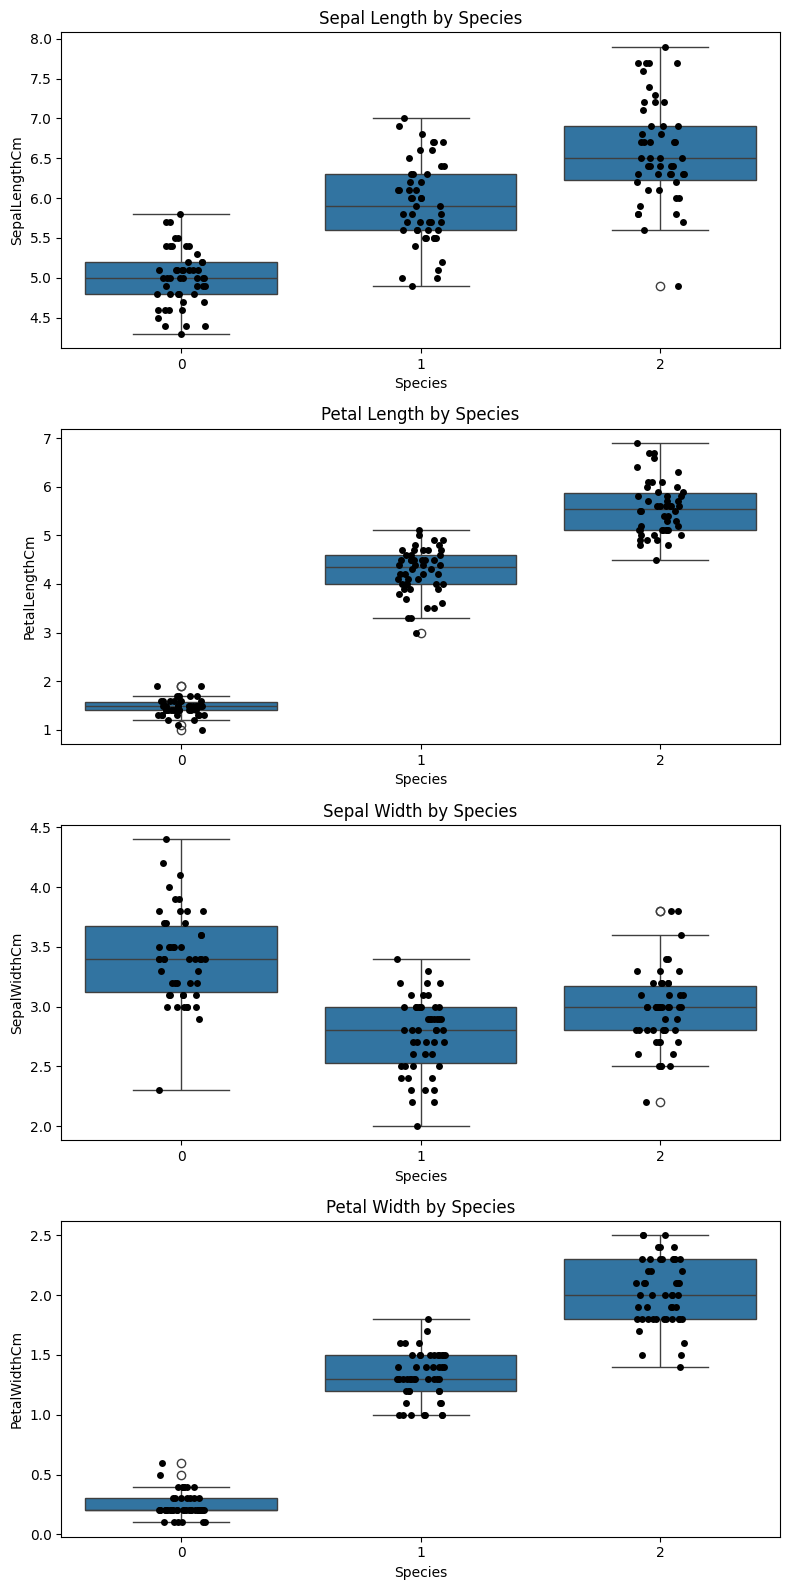

In [15]:
fig,axes = plt.subplots(4, 1, figsize=(8,16))  # 4 rows, 1 column

sns.boxplot(x='Species', y='SepalLengthCm', data=df, ax=axes[0])
sns.stripplot(x='Species', y='SepalLengthCm', data=df, color='black', jitter=True,ax=axes[0])
axes[0].set_title('Sepal Length by Species')

sns.boxplot(x='Species', y='PetalLengthCm', data=df, ax=axes[1])
sns.stripplot(x='Species', y='PetalLengthCm', data=df, color='black', jitter=True,ax=axes[1])
axes[1].set_title('Petal Length by Species')

sns.boxplot(x='Species', y='SepalWidthCm', data=df, ax=axes[2])
sns.stripplot(x='Species', y='SepalWidthCm', data=df, color='black', jitter=True,ax=axes[2])
axes[2].set_title('Sepal Width by Species')

sns.boxplot(x='Species', y='PetalWidthCm', data=df, ax=axes[3])
sns.stripplot(x='Species', y='PetalWidthCm', data=df, color='black', jitter=True,ax=axes[3])
axes[3].set_title('Petal Width by Species')

plt.tight_layout()
plt.show()

Pairplot of each feature with respect to species

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


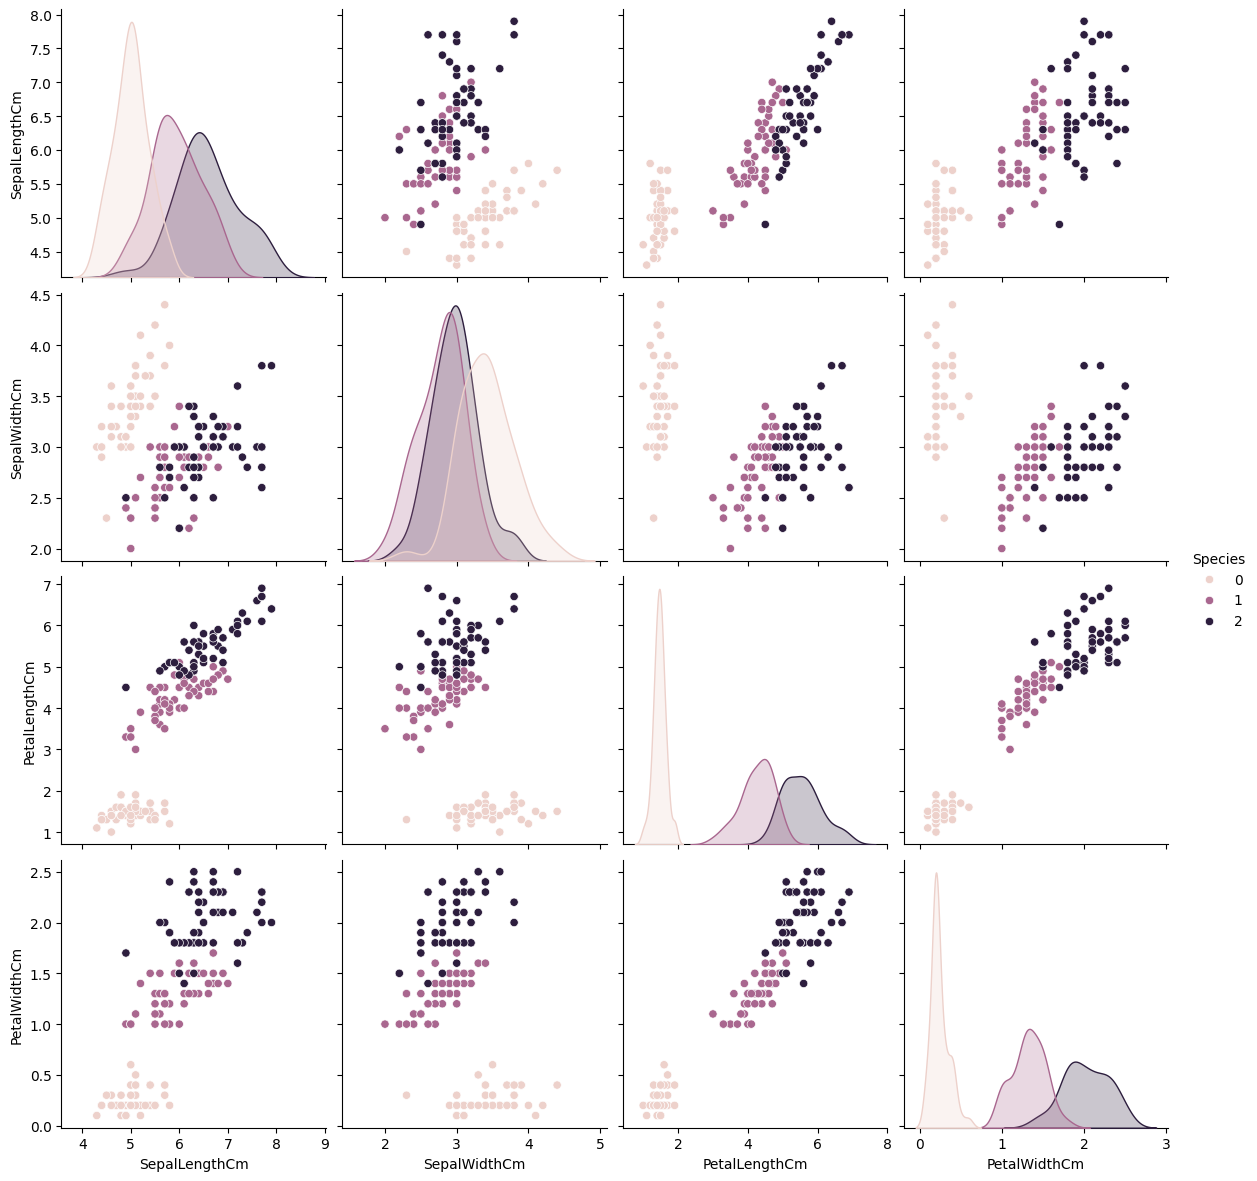

In [16]:
sns.pairplot(df.drop("Id",axis=1),hue="Species",size=3)

In [17]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

Inference:
Species Versicolor and virginica have overlaping features. While setosa is well separated from other two

Correlation

Correlation is a statistical measure that shows how strongly two variables are related to each other.

Positive correlation: when one variable increases, the other tends to increase.
→ e.g., height and weight.

Negative correlation: when one variable increases, the other tends to decrease.
→ e.g., exercise and body fat.

Zero correlation: no relationship between the variables.

Heatmap

A heatmap is a visual representation of data using colors to show the magnitude of values in a matrix.

In the context of correlation:

A heatmap shows the correlation matrix.

Stronger correlations are shown with more intense colors.

In [20]:
# Compute correlation matrix
corr_matrix = df.corr()
corr_matrix

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


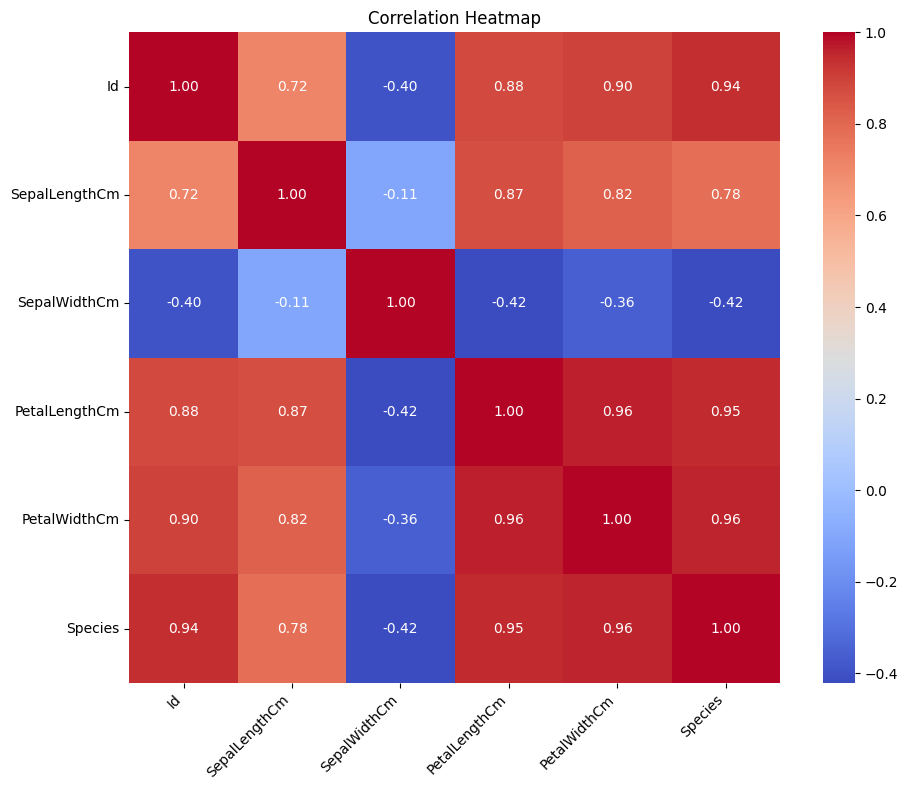

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.index)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [22]:
print(df.dtypes)
print(df.head())
print(corr_matrix.round(2))

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0
                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
Id             1.00           0.72         -0.40           0.88          0.90   
SepalLengthCm  0.72           1.00         -0.11           0.87          0.82   
SepalWidthCm  -0.40          -0.11          1.00          -0.42         -0.36   
PetalLengthCm  0.88           0.87         -0.42           1.00          0

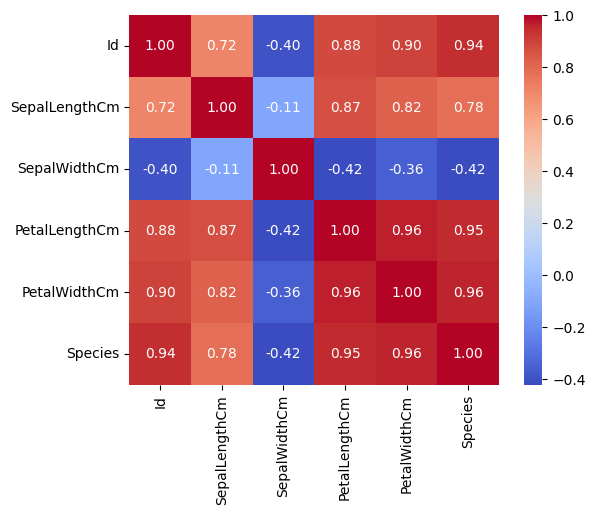

In [23]:
# Plot heatmap with null values masked
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    )


plt.show()

In [24]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


Model Training

In [25]:
X=df.drop(columns=['Species'])
y=df['Species']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

Model 1 - Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred_model1=model1.predict(X_test)

print('Accuracy of Logistic Regression:',accuracy_score(y_test,y_pred_model1)*100)
print(confusion_matrix(y_test,y_pred_model1))
print(classification_report(y_test,y_pred_model1))

Accuracy of Logistic Regression: 100.0
[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
train_acc=model1.score(X_train,y_train)
test_acc=model1.score(X_test,y_test)

print(f"Train accuracy:{train_acc}")
print(f"Test accuracy:{test_acc}")

Train accuracy:1.0
Test accuracy:1.0


Inference:
Logistic Regression gives accuracy of 100
Confusion matrix perfectly classifies the species
Works very well due to linear separability

Model 2 - KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train,y_train)
y_pred_model2=model2.predict(X_test)

print("Accuracy (KNN):",accuracy_score(y_test,y_pred_model2)*100)
print(confusion_matrix(y_test,y_pred_model2))
print(classification_report(y_test,y_pred_model2))

Accuracy (KNN): 100.0
[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Inference:
KNN gives accuracy of 100
Confusion Matrix perfectly classifies the species
Works well with iris as distances between classes are distinct

Model 3 - Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
y_pred_model3=model3.predict(X_test)

print("Accuracy(DecisionTree):",accuracy_score(y_test,y_pred_model3)*100)
print(confusion_matrix(y_test,y_pred_model3))
print(classification_report(y_test,y_pred_model3))

Accuracy(DecisionTree): 97.77777777777777
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Inference:
Decision Tree gives accuracy of 97.77777
Confusion Matrix has errors in between two classes versicolor and virginica as sepota is easily separable from other two.
For versicolor one sample is falsely classified as virginica so in confusion matrix 17 detected correctly as versicolor as 1 detected as virginica

Model 4 - SVM

In [31]:
from sklearn.svm import SVC
model4=SVC()
model4.fit(X_train,y_train)
y_pred_model4=model4.predict(X_test)

print("Accuracy(SVM):",accuracy_score(y_test,y_pred_model4)*100)
print(confusion_matrix(y_test,y_pred_model4))
print(classification_report(y_test,y_pred_model4))

Accuracy(SVM): 97.77777777777777
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Inference:
SVM gives accuracy of 97.77777
Confusion Matrix has errors in between two classes versicolor and virginica, as sepota is easily separable from other two.
For versicolor one sample is falsely classified as virginica so in confusion matrix 17 detected correctly as versicolor and 1 detected as virginica

Model 5 - Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

model5=RandomForestClassifier()
model5.fit(X_train,y_train)
y_pred_model5=model5.predict(X_test)

print("Accuracy(SVM):",accuracy_score(y_test,y_pred_model5)*100)
print(confusion_matrix(y_test,y_pred_model5))
print(classification_report(y_test,y_pred_model5))

Accuracy(SVM): 100.0
[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Inference:
Random Forest gives accuracy of 100
Confusion Matrix perfectly classifies the species

Model 6 - Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

model6=GaussianNB()
model6.fit(X_train,y_train)
y_pred_model6=model6.predict(X_test)

print("Accuracy(SVM):",accuracy_score(y_test,y_pred_model6)*100)
print(confusion_matrix(y_test,y_pred_model6))
print(classification_report(y_test,y_pred_model6))

Accuracy(SVM): 100.0
[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Inference:
Naive Bayes gives accuracy of 100
Confusion Matrix perfectly classifies the species

Model 7 - Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

model7=GradientBoostingClassifier()
model7.fit(X_train,y_train)
y_pred_model7=model7.predict(X_test)

print("Accuracy(SVM):",accuracy_score(y_test,y_pred_model7)*100)
print(confusion_matrix(y_test,y_pred_model7))
print(classification_report(y_test,y_pred_model7))

Accuracy(SVM): 97.77777777777777
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Inference:
Gradient Boosting gives accuracy of 97.77777
Confusion Matrix has errors in between two classes versicolor and virginica, as sepota is easily separable from other two.
For versicolor one sample is falsely classified as virginica so in confusion matrix 17 detected correctly as versicolor and 1 detected as virginica

Model 8 - XGBoost

In [35]:
!pip install xgboost

from xgboost import XGBClassifier

model8=XGBClassifier()
model8.fit(X_train,y_train)
y_pred_model8=model8.predict(X_test)

print("Accuracy(SVM):",accuracy_score(y_test,y_pred_model8)*100)
print(confusion_matrix(y_test,y_pred_model8))
print(classification_report(y_test,y_pred_model8))

Accuracy(SVM): 100.0
[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Inference:
Naive Bayes gives accuracy of 100
Confusion Matrix perfectly classifies the species

             ML Algorithms        Accuracy score
Model 1 - Logistic Regression        100
Model 2 - KNN                        100
Model 3 - Decision Tree              97.77777
Model 4 - SVM                        97.77777
Model 5 - Random Forest              100
Model 6 - Naive Bayes                100
Model 7 - Gradient Boosting          97.77777
Model 8 - XGBoost                    100